C:\Users\adria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


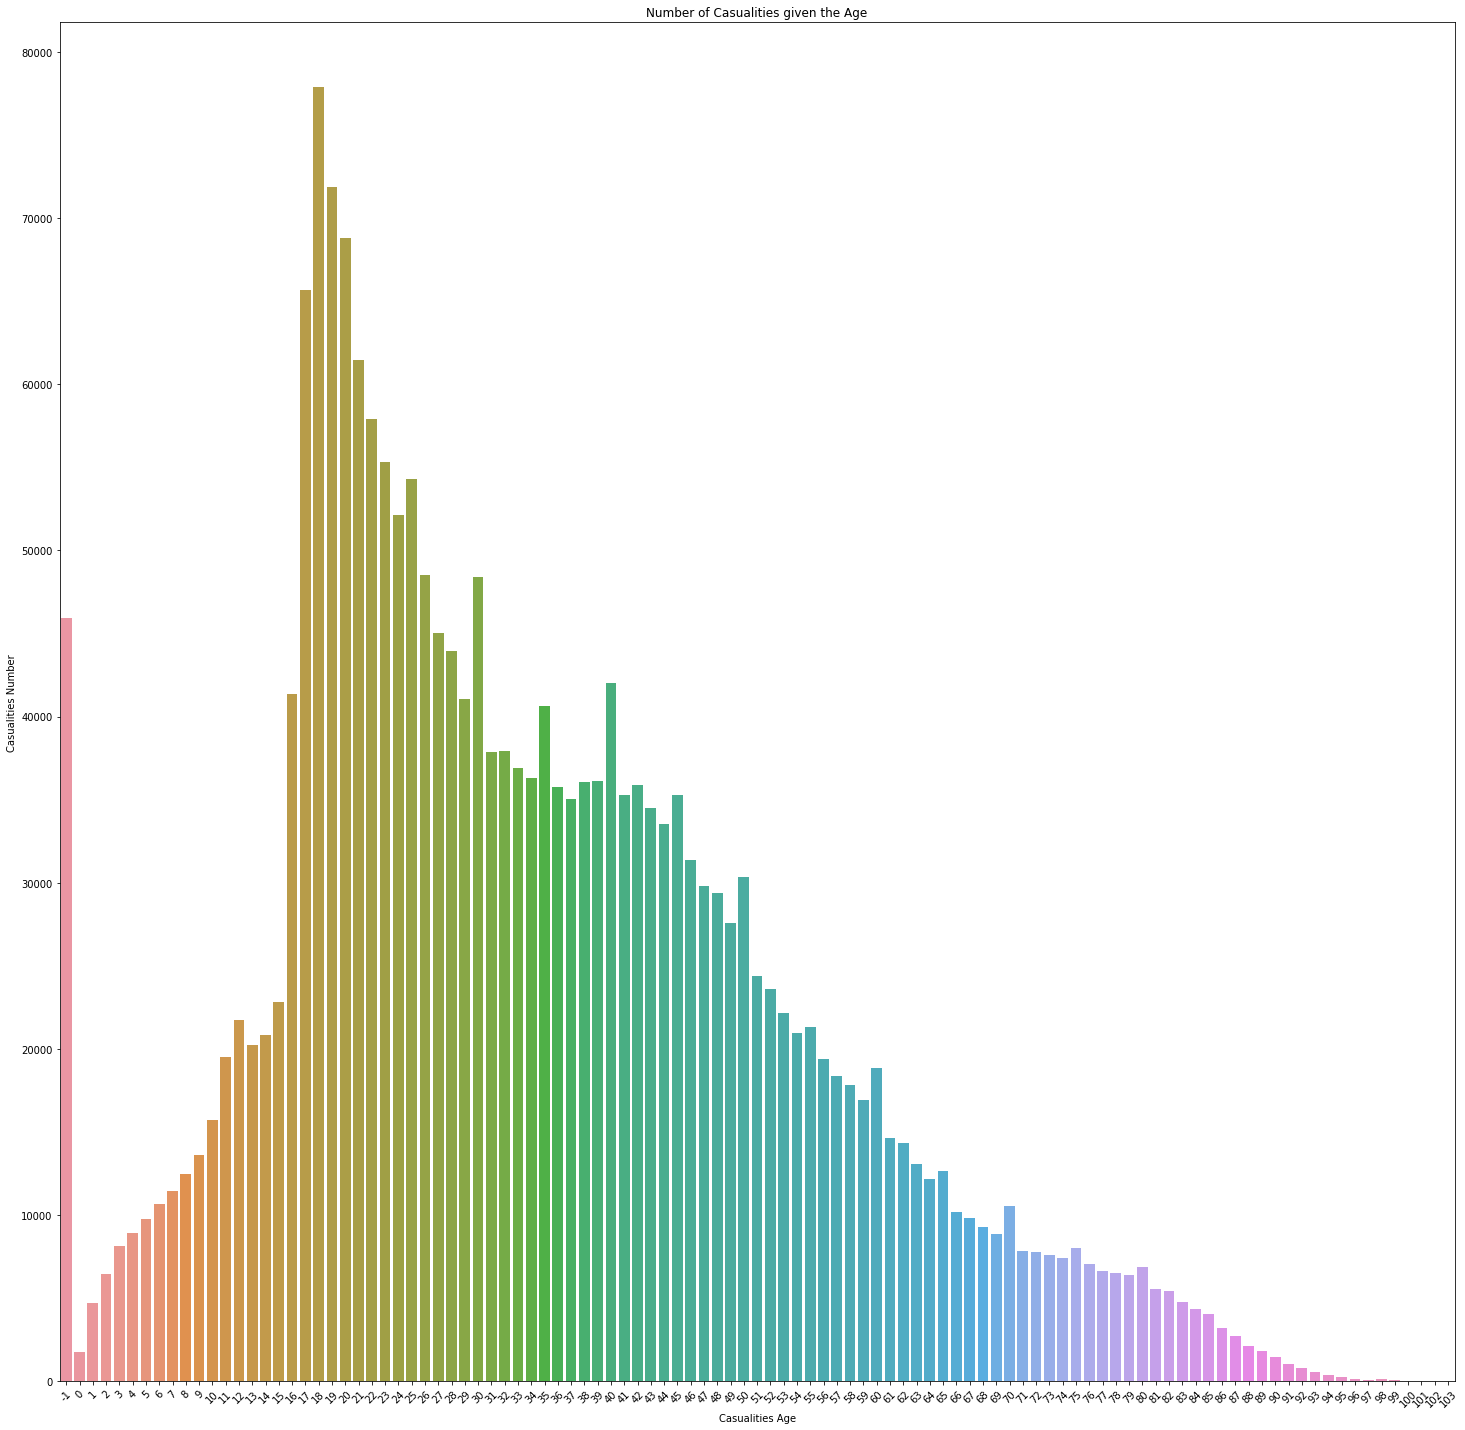

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

casualties = pd.read_csv("data/Casualties0514.csv")
accidents = pd.read_csv("data/Accidents0514.csv")
vehicles = pd.read_csv("data/Vehicles0514.csv")
lookup = pd.ExcelFile("data/Road-Accident-Safety-Data-Guide.xls")

people_age = casualties["Age_of_Casualty"].value_counts(dropna =False)

plt.figure(figsize=(25,25))
sns.barplot(x=people_age.index, y=people_age)
plt.xticks(rotation= 45)
plt.xlabel('Casualities Age')
plt.ylabel('Casualities Number')
plt.title('Number of Casualities given the Age')

plt.show()

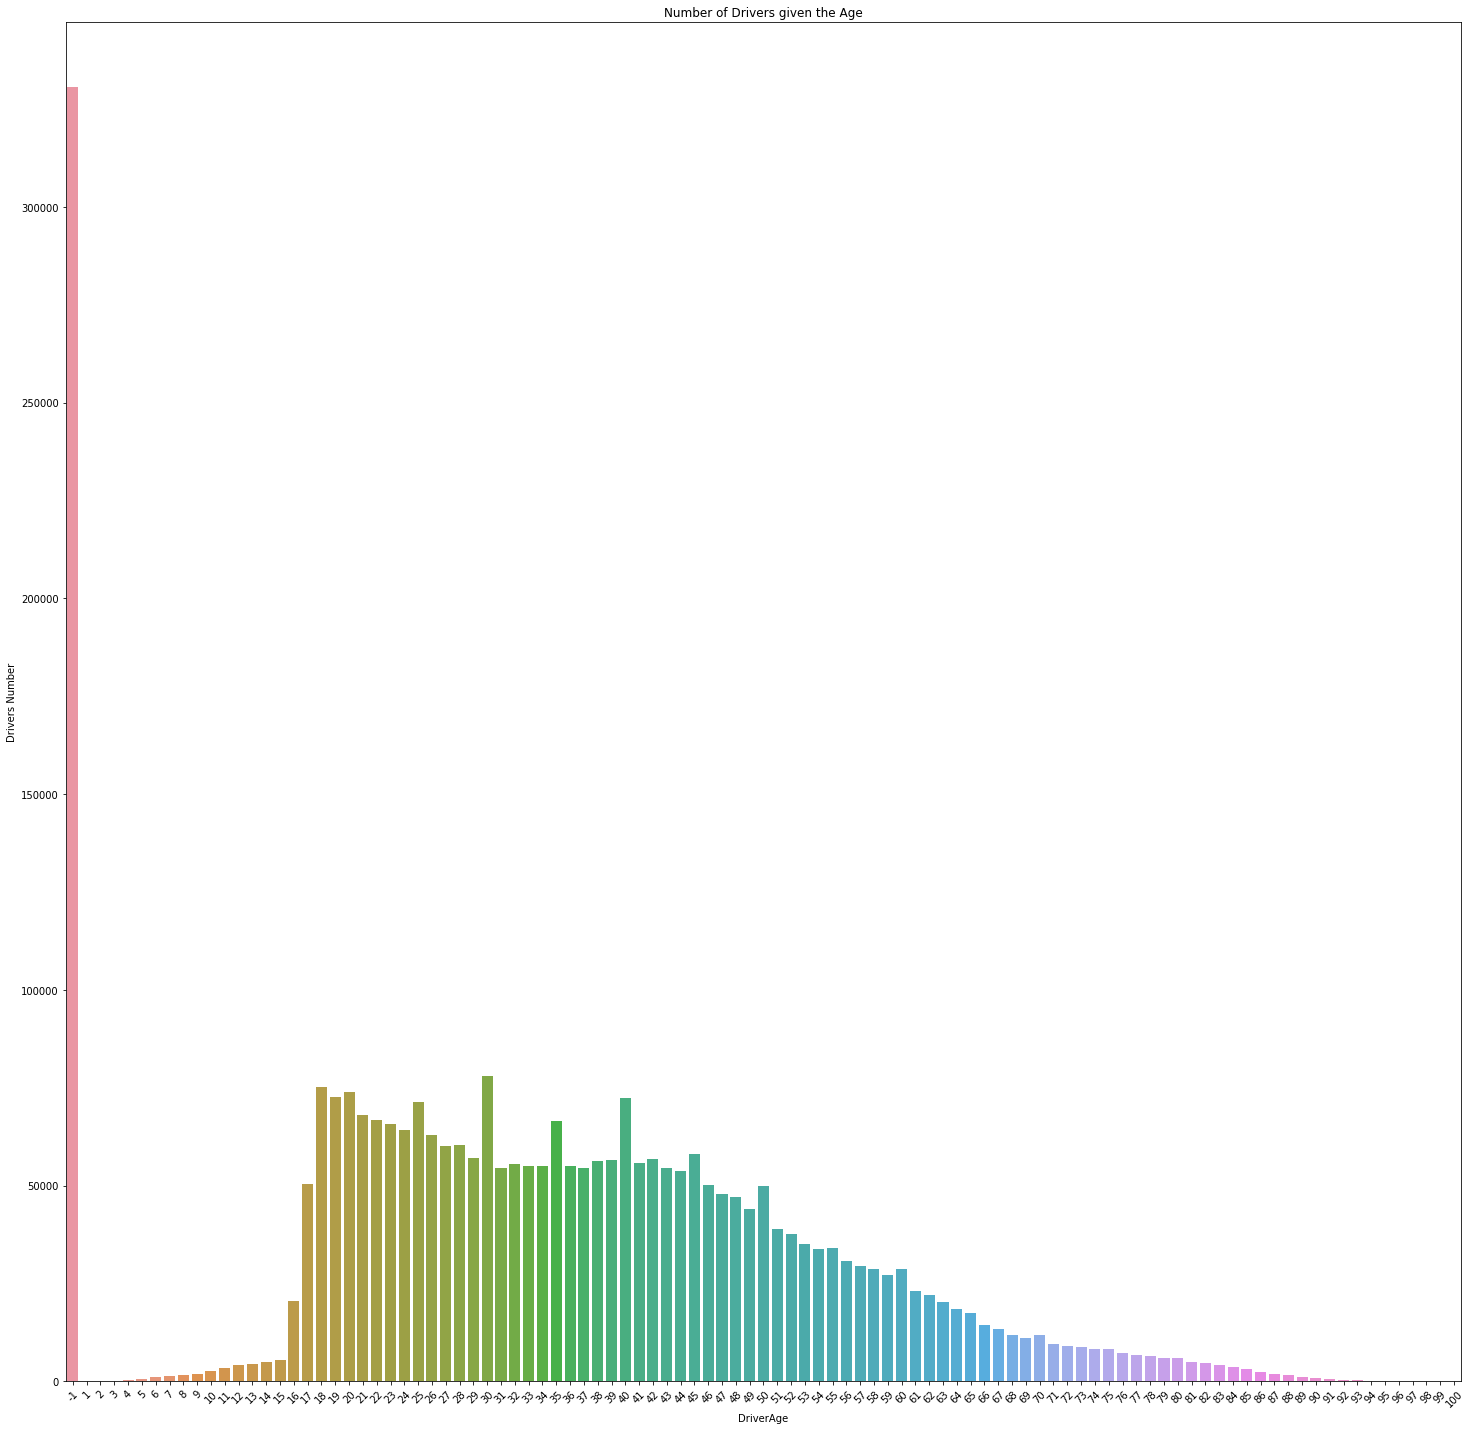

In [16]:
driver_age = vehicles["Age_of_Driver"].value_counts(dropna =False)

plt.figure(figsize=(25,25))
sns.barplot(x=driver_age.index, y=driver_age)
plt.xticks(rotation= 45)
plt.xlabel('DriverAge')
plt.ylabel('Drivers Number')
plt.title('Number of Drivers given the Age')

plt.show()

Text(0.5, 1.0, 'Number of vehicles given the Age')

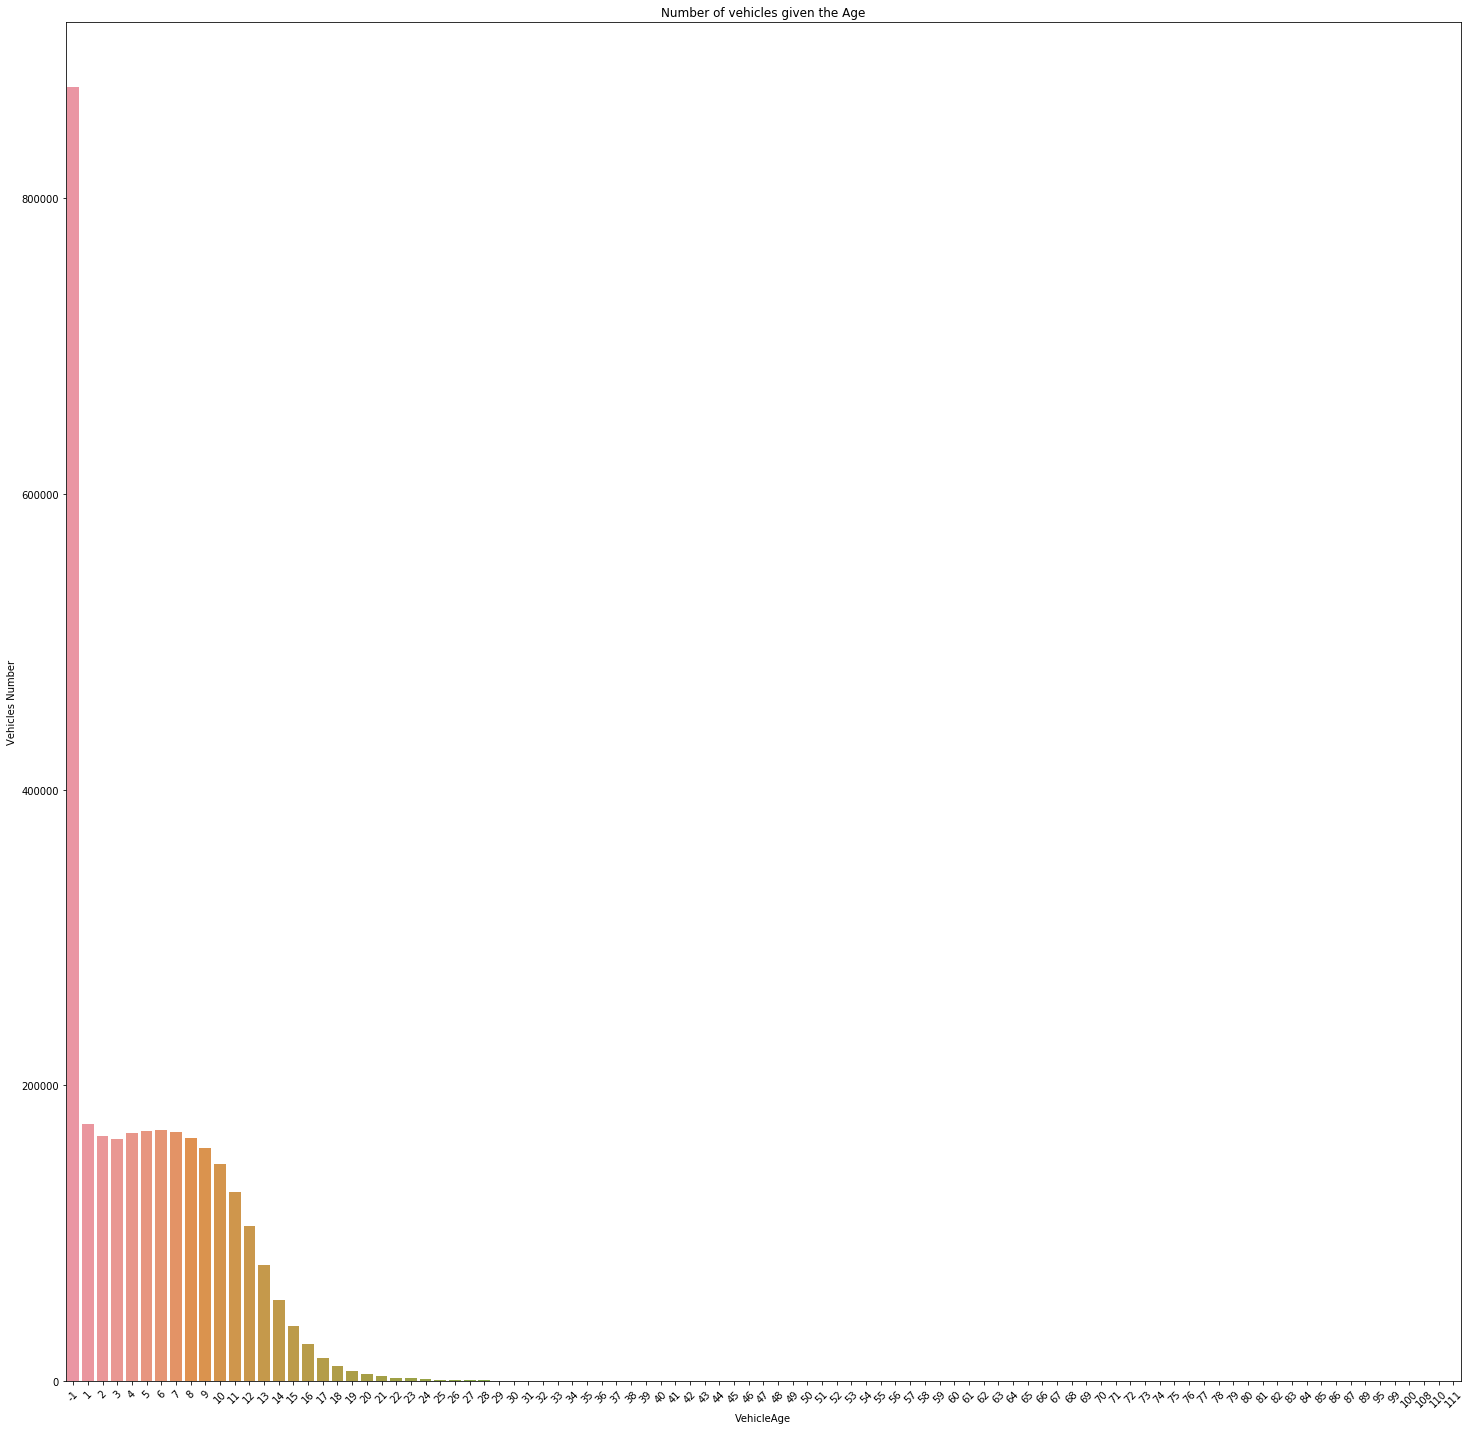

In [17]:
driver_age = vehicles["Age_of_Vehicle"].value_counts(dropna =False)

plt.figure(figsize=(25,25))
sns.barplot(x=driver_age.index, y=driver_age)
plt.xticks(rotation= 45)
plt.xlabel('VehicleAge')
plt.ylabel('Vehicles Number')
plt.title('Number of vehicles given the Age')

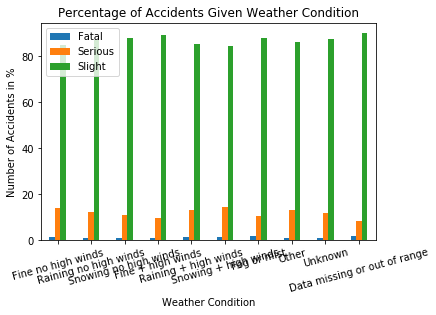

In [18]:
weather_lookup = lookup.parse("Weather")
accident_severity_lookup = lookup.parse("Accident Severity")
accidents_weather = pd.merge(accidents["Accident_Severity"], accidents["Weather_Conditions"], right_index=True,
                             left_index=True)

fatal = accidents_weather[accidents_weather['Accident_Severity'] == 1]["Weather_Conditions"].value_counts(
    dropna=False).values
serious = accidents_weather[accidents_weather['Accident_Severity'] == 2]["Weather_Conditions"].value_counts(
    dropna=False).values
slight = accidents_weather[accidents_weather['Accident_Severity'] == 3]["Weather_Conditions"].value_counts(
    dropna=False).values

total = fatal + serious + slight

fatal = fatal * 100 / total
serious = serious * 100 / total
slight = slight * 100 / total

weather_labels = weather_lookup["label"].values.tolist()

testdata = pd.DataFrame({"Fatal": fatal, "Serious": serious, "Slight": slight},
                        index=weather_labels)
ax = testdata.plot.bar()
plt.xticks(rotation=15)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents in %')
plt.title('Percentage of Accidents Given Weather Condition')
plt.show()

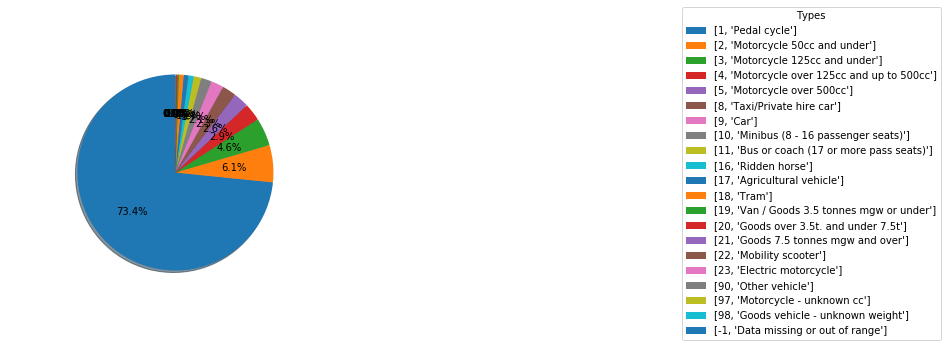

In [23]:
vehicles = pd.read_csv("data/Vehicles0514.csv")
lookup = pd.ExcelFile("data/Road-Accident-Safety-Data-Guide.xls")
vehicle_type_lookup = lookup.parse("Vehicle Type")
vehicle_type_lookup = vehicle_type_lookup.values.tolist()

vehicle_count = vehicles["Vehicle_Type"].value_counts(
    dropna=False).values

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(vehicle_count, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.legend(wedges, vehicle_type_lookup,
          title="Types",
          loc="center left",
          bbox_to_anchor=(2, 0, 2, 1))

ax1.axis('equal')

plt.show()

In [24]:
import pickle
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

n_clusters = 100
count = 0
train_dataset = []


def load_dataset():
    global count
    global n_clusters
    global train_dataset
    vehicles = pd.read_csv("data/Vehicles0514.csv")

    Sex_of_Driver = vehicles["Sex_of_Driver"].values.tolist()
    Age_of_Driver = vehicles["Age_of_Driver"].values.tolist()
    Engine_Capacity = vehicles["Engine_Capacity_(CC)"].values.tolist()
    Age_of_Vehicle = vehicles["Age_of_Vehicle"].values.tolist()

    for i in range(len(Sex_of_Driver)):
        sex = Sex_of_Driver[i]
        age = Age_of_Driver[i]
        capacity = Engine_Capacity[i]
        age_vehicle = Age_of_Vehicle[i]

        if sex != -1 and age != -1 and capacity != -1 and age_vehicle != -1:
            train_dataset.append([sex, age, capacity / 1000, age_vehicle])
            count += 1


def train():
    global n_clusters
    global train_dataset

    X = np.array(train_dataset)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    pickle.dump(kmeans, open("./data/kmeans.pkl", "wb"))

In [25]:
def predict():
    global n_clusters
    global count

    kmeans = pickle.load(open("./data/kmeans.pkl", "rb"))
    probability = np.bincount(kmeans.labels_) / (np.ones(shape=(n_clusters)) * count)
    print("done")

    label = kmeans.predict([[1, 23, 1.500, 15]])[0]
    print(probability[label])
    label = kmeans.predict([[2, 23, 1.995, 23]])[0]
    print(probability[label])
    label = kmeans.predict([[1, 24, 1.5, 5]])[0]
    print(probability[label])
    label = kmeans.predict([[1, 40, 1.968, 5]])[0]
    print(probability[label])
    label = kmeans.predict([[2, 24, 1.968, 5]])[0]
    print(probability[label])


load_dataset()
train()
predict()

done
0.012433926974058714
0.001244714157924697
0.020932442872245265
0.021343620395218345
0.020932442872245265
